WeatherPy
============
------------
## Analysis

- Temperatures tends to be higher as latitude get closer to the equator.
- There is no correlation between the cloudiness and the distance from the equator.
- Humidity seems to be higher nearby the equator, specially in the southern region.

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import json
import requests
import random
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from citipy import citipy

#Config
from config import api_key

## Generate Coordinates List

In [2]:
#Lists to store values
long = []
lat = []
coordinates = []

#Loops to populate coordinates list with random values for lat and long, covering all regions of the world.

#North America
for c1 in range (0,250):
    dec_long = random.random()/10
    dec_lat = random.random()/10
    long.append(round(float(random.randint(-120,-60)+dec_long),3))
    lat.append(round(float(random.randint(15,70)+dec_lat),3))
    
#Europe, Asia, Northern Africa
for c2 in range (0,250):
    dec_long = random.random()/10
    dec_lat = random.random()/10
    long.append(round(float(random.randint(-15,150)+dec_long),3))
    lat.append(round(float(random.randint(0,75)+dec_lat),3))

#Central and South America
for c3 in range (0,250):
    dec_long = random.random()/10
    dec_lat = random.random()/10
    long.append(round(float(random.randint(-90,-60)+dec_long),3))
    lat.append(round(float(random.randint(-60,-15)+dec_lat),3))

#Africa
for c4 in range (0,250):
    dec_long = random.random()/10
    dec_lat = random.random()/10
    long.append(round(float(random.randint(0,60)+dec_long),3))
    lat.append(round(float(random.randint(-30,0)+dec_lat),3))

#South East Asia and Oceania
for c5 in range (0,150):
    dec_long = random.random()/10
    dec_lat = random.random()/10
    long.append(round(float(random.randint(105,180)+dec_long),3))
    lat.append(round(float(random.randint(-60,0)+dec_lat),3))

#Populate all lat and long values on the coordinates list
for x in range (0,len(lat)):
    coordinates.append([lat[x], long[x]]) 

## Generate Cities List

In [3]:
#List to store city names
cities = []

#Loop to populate cities list with city names
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    name = citipy.nearest_city(lat, lon) 
    cities.append(name)

#Remove Duplicates
cities = list(set(cities))

#Count of unique cities in our list
len(cities)

651

## Perform API Calls

In [4]:
#Variables values
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Lists to store reponse info
lat = []
temp = []
name = []
humid = []
clouds = []
wind = []

#Initial print for our Data Retrieval process
print("Beginning Data Retrieval")
print("-----------------------------")

#Counter for the processed records
count = 1

#Loop to retrieve all the information required from the Weather API
for city in cities:
    query_url = f"{url}appid={api_key}&units={units}&q="
    # Get weather data
    response = requests.get(query_url+city.city_name).json()
    try:
        #Required information stored in a variable
        cname = response['name']
        ctemp = response['main']['temp']
        clat = response['coord']['lat']
        chum = response['main']['humidity']
        ccld = response['clouds']['all']
        cwnd = response['wind']['speed'] 
        #Values stored in their respective list
        lat.append(clat)
        temp.append(ctemp)
        name.append(cname)
        humid.append(chum)
        clouds.append(ccld)
        wind.append(cwnd)
        #Replace spaces in the city name to show proper URL
        name_print = cname.replace(" ","%20")
        #Print log information to validate data retrieval process
        print(f"Processing Record {count} | {cname}") 
        print(f"{query_url}&q={name_print}")
        #Increase count for the next record
        count = count + 1
    #Error handling for Key Errors
    except KeyError:
        print("City not found. Skipping...")
        continue
        
#Final print for our Data Retrieval process
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")
print(str(len(name))+ " cities were processed.")  

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Kirakira
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Kirakira
Processing Record 2 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Alice%20Springs
Processing Record 3 | Matamoros
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Matamoros
Processing Record 4 | Chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Chernyshevskiy
Processing Record 5 | Tessalit
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Tessalit
Processing Record 6 | Walla Walla
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Walla%20Walla
Processing Record 7 | Mookane
http://api.openwe

Processing Record 55 | Oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Oktyabrskoye
Processing Record 56 | Klyuchi
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Klyuchi
Processing Record 57 | Isangel
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Isangel
Processing Record 58 | Florence
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Florence
City not found. Skipping...
Processing Record 59 | Rudnaya Pristan
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Rudnaya%20Pristan
Processing Record 60 | Kichmengskiy Gorodok
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Kichmengskiy%20Gorodok
Processing Record 61 | Grootfontein
http://api.openweath

Processing Record 110 | Baruun-Urt
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Baruun-Urt
Processing Record 111 | Spas-Klepiki
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Spas-Klepiki
Processing Record 112 | Constantine
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Constantine
Processing Record 113 | Villa Union
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Villa%20Union
Processing Record 114 | Hobart
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Hobart
Processing Record 115 | Durant
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Durant
Processing Record 116 | Millau
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c

Processing Record 165 | Marmaris
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Marmaris
Processing Record 166 | Nizamabad
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Nizamabad
City not found. Skipping...
Processing Record 167 | Kangaba
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Kangaba
Processing Record 168 | Agua Verde
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Agua%20Verde
Processing Record 169 | Lasa
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Lasa
Processing Record 170 | Sabang
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Sabang
Processing Record 171 | Salamanca
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee

Processing Record 220 | Petauke
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Petauke
Processing Record 221 | Pahrump
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Pahrump
Processing Record 222 | Algodones
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Algodones
Processing Record 223 | Portree
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Portree
Processing Record 224 | San Juan
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=San%20Juan
Processing Record 225 | Frontera
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Frontera
Processing Record 226 | Murdochville
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&uni

Processing Record 275 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Port%20Augusta
Processing Record 276 | Kawalu
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Kawalu
Processing Record 277 | Pierre
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Pierre
Processing Record 278 | Athabasca
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Athabasca
Processing Record 279 | Brighton
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Brighton
Processing Record 280 | San Pedro
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=San%20Pedro
Processing Record 281 | Maumere
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef31504

Processing Record 330 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Ushuaia
City not found. Skipping...
Processing Record 331 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Busselton
Processing Record 332 | Boueni
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Boueni
Processing Record 333 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Iqaluit
Processing Record 334 | Venado Tuerto
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Venado%20Tuerto
Processing Record 335 | Borogontsy
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Borogontsy
Processing Record 336 | Byron Bay
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 385 | Coracora
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Coracora
Processing Record 386 | Iquique
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Iquique
Processing Record 387 | Epinal
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Epinal
Processing Record 388 | Dodge City
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Dodge%20City
Processing Record 389 | Sitrah
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Sitrah
Processing Record 390 | Kulu
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Kulu
Processing Record 391 | Corrales
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q

City not found. Skipping...
Processing Record 441 | Hanna
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Hanna
Processing Record 442 | Sortland
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Sortland
Processing Record 443 | Ihosy
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Ihosy
Processing Record 444 | Buala
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Buala
Processing Record 445 | Black River
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Black%20River
Processing Record 446 | Bandar
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Bandar
Processing Record 447 | Calama
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef

Processing Record 497 | Vieux-Habitants
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Vieux-Habitants
Processing Record 498 | Olavarria
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Olavarria
Processing Record 499 | Kabompo
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Kabompo
Processing Record 500 | Asyut
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Asyut
Processing Record 501 | Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Saint-Joseph
Processing Record 502 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Saint-Augustin
Processing Record 503 | Booue
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990

Processing Record 552 | Isaka
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Isaka
Processing Record 553 | Malanje
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Malanje
Processing Record 554 | Port Hawkesbury
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Port%20Hawkesbury
Processing Record 555 | Morondava
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Morondava
Processing Record 556 | Parral
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Parral
Processing Record 557 | Namibe
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&units=metric&q=&q=Namibe
Processing Record 558 | Nosy Varika
http://api.openweathermap.org/data/2.5/weather?appid=7024b31d48990ee20b063c59ef315042&

## Create DataFrame and CSV File

In [11]:
#Create dictionary of the information collected from the API
weather_dict = {
    "city": name,
    "lat": lat,
    "temp": temp,
    "humidity": humid,
    "cloudiness": clouds,
    "wind_speed": wind
}

#Create data frame from the dictionary
weather_data = pd.DataFrame(weather_dict)

#Create CSV file from the Data Frame
weather_data.to_csv("weather_data.csv", index=False)

#Show first rows of the Data Frame
weather_data.head()

,city,cloudiness,humidity,lat,temp,wind_speed
0,Kirakira,88,100,-10.46,29.33,4.7
1,Alice Springs,0,14,-23.70,34.00,9.3
2,Matamoros,40,88,25.87,24.00,7.7
3,Chernyshevskiy,20,51,63.01,-13.50,5.6
4,Tessalit,20,28,20.20,20.40,2.1


## Latitude vs Temperature Plot

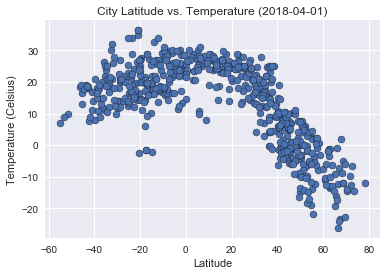

In [7]:
# Build a scatter plot for latitude vs temperature
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (" + str(date.today()) + ")")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
sb.set()

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs Humidity Plot

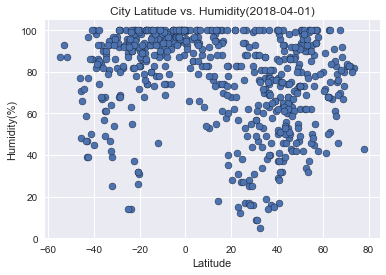

In [8]:
# Build a scatter plot for latitude vs humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o", edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(" + str(date.today()) + ")")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
sb.set()

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs Cloudiness Plot

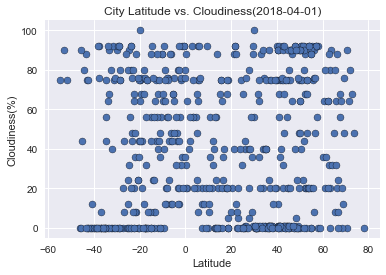

In [9]:
# Build a scatter plot for latitude vs cloudiness
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o", edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(" + str(date.today()) + ")")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
sb.set()

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs Wind Speed Plot

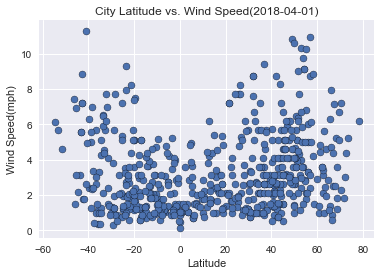

In [10]:
# Build a scatter plot for latitude vs wind speed
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o", edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(" + str(date.today()) + ")")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
sb.set()

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()